<a href="https://colab.research.google.com/github/Jarnoesse/IA-AGN-with-ML/blob/main/classifier_regressor_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import astropy.units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_log_error, plot_confusion_matrix, classification_report, explained_variance_score

from pandas.plotting import scatter_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

import lightgbm as lgb

import missingno as msno

plt.style.use('seaborn')


import os.path

In [130]:
table_des_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_DES_specZ_milliquas_basicFeatures.csv'
table_des_cat = Table.read(table_des_catalogue_URL)

des_df = table_des_cat.to_pandas()

table_ps_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_PS_specZ_milliquas_basicFeatures.csv'
table_ps_cat = Table.read(table_ps_catalogue_URL)

ps_df = table_ps_cat.to_pandas()

table_sm_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_SM_specZ_milliquas_basicFeatures.csv'
table_sm_cat = Table.read(table_sm_catalogue_URL)

sm_df = table_sm_cat.to_pandas()

In [131]:
des_df['W1-W2'] = des_df['W1MAG']-des_df['W2MAG']
des_df['J-KS'] = des_df['J_VISTA']-des_df['KS_VISTA']
des_df['KS-W1'] = des_df['KS_VISTA']-des_df['W1MAG']
des_df['G-R'] = des_df['MAG_G']-des_df['MAG_R']
des_df['R-Z'] = des_df['MAG_R']-des_df['MAG_Z']
des_df['Z-J'] = des_df['MAG_Z']-des_df['J_VISTA']
des_df['G-RadioR'] = des_df['MAG_G']-des_df['flux_int']
des_df['W2-RadioR'] = des_df['W2MAG']-des_df['flux_int']

ps_df['W1-W2'] = ps_df['W1MAG']-ps_df['W2MAG']
ps_df['J-KS'] = ps_df['J_VISTA']-ps_df['KS_VISTA']
ps_df['KS-W1'] = ps_df['KS_VISTA']-ps_df['W1MAG']
ps_df['G-R'] = ps_df['MAG_G']-ps_df['MAG_R']
ps_df['R-Z'] = ps_df['MAG_R']-ps_df['MAG_Z']
ps_df['Z-J'] = ps_df['MAG_Z']-ps_df['J_VISTA']
ps_df['G-RadioR'] = ps_df['MAG_G']-ps_df['flux_int']
ps_df['W2-RadioR'] = ps_df['W2MAG']-ps_df['flux_int']

sm_df['W1-W2'] = sm_df['W1MAG']-sm_df['W2MAG']
sm_df['J-KS'] = sm_df['J_VISTA']-sm_df['KS_VISTA']
sm_df['KS-W1'] = sm_df['KS_VISTA']-sm_df['W1MAG']
sm_df['U-G'] = sm_df['MAG_U']-sm_df['MAG_G']
sm_df['G-R'] = sm_df['MAG_G']-sm_df['MAG_R']
sm_df['R-Z'] = sm_df['MAG_R']-sm_df['MAG_Z']
sm_df['Z-J'] = sm_df['MAG_Z']-sm_df['J_VISTA']
sm_df['G-RadioR'] = sm_df['MAG_G']-sm_df['flux_int']
sm_df['W2-RadioR'] = sm_df['W2MAG']-sm_df['flux_int']

In [132]:
des_df

,col0,catalogue_id,n_components,flux_int,flux_peak,quality_level,SOURCEID_VISTA,W1MAG,W2MAG,J_VISTA,KS_VISTA,PSTAR_VISTA,MAG_G,MAG_R,MAG_I,MAG_Z,z_spec,spec_class,W1-W2,J-KS,KS-W1,G-R,R-Z,Z-J,G-RadioR,W2-RadioR
0,2,1542,1,15.087712,15.005931,"b""b'NOT_VALIDATED'""",472906754566,15.582000,15.717,15.234133,14.885287,0.000171,16.596,15.817,15.492,15.222,0.062,1,-0.135000,0.348846,-0.696713,0.779,0.595,-0.012133,1.508288,0.629288
1,10,783,1,14.791615,15.142908,"b""b'NOT_VALIDATED'""",472906735951,16.441000,16.106,17.142910,16.910446,0.052478,17.561,17.526,17.507,17.502,0.723,1,0.334999,0.232464,0.469447,0.035,0.024,0.359090,2.769385,1.314385
2,13,1377,1,13.793266,13.862125,"b""b'NOT_VALIDATED'""",472681339854,19.573001,19.623,19.522250,19.605973,0.052478,20.136,19.883,19.735,19.732,3.061,1,-0.050000,-0.083723,0.032972,0.253,0.151,0.209750,6.342734,5.829734
3,14,97,1,13.474419,13.774631,"b""b'NOT_VALIDATED'""",472890266372,18.098000,17.416,17.961023,18.245827,0.993865,17.905,17.771,17.820,17.885,NaN,<NA>,0.682001,-0.284804,0.147827,0.134,-0.114,-0.076023,4.430581,3.941581
4,15,44,1,18.826541,14.740983,"b""b'UNCERTAIN '""",473426008788,17.230000,17.017,17.044435,16.486081,0.003067,18.515,17.967,17.429,17.219,NaN,<NA>,0.213000,0.558354,-0.743919,0.548,0.748,0.174565,-0.311541,-1.809540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175749,259245,675,1,15.166006,15.044805,"b""b'NOT_VALIDATED'""",473340908930,17.226000,17.430,16.921362,16.488793,0.000171,19.306,18.101,17.661,17.388,0.279,1,-0.203999,0.432569,-0.737207,1.205,0.713,0.466638,4.139994,2.263993
175750,259246,2281,1,11.623332,11.657555,"b""b'NOT_VALIDATED'""",473200338277,16.889000,16.816,16.904316,16.434285,0.003067,19.288,18.053,17.607,17.442,NaN,<NA>,0.072999,0.470031,-0.454715,1.235,0.611,0.537684,7.664668,5.192668
175751,259247,1484,1,15.057342,14.844983,"b""b'NOT_VALIDATED'""",472854980131,14.490000,13.830,17.293708,15.488930,0.486486,19.174,18.304,17.976,17.829,NaN,<NA>,0.660000,1.804778,0.998930,0.870,0.475,0.535292,4.116658,-1.227342
175752,259249,2758,1,16.405442,15.796757,"b""b'NOT_VALIDATED'""",472602670940,17.321000,16.871,17.172320,17.063626,0.003067,18.257,17.758,17.597,17.445,NaN,<NA>,0.450000,0.108694,-0.257374,0.499,0.313,0.272680,1.851558,0.465557


In [133]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

In [134]:
ps_df

,col0,catalogue_id,n_components,flux_int,flux_peak,quality_level,SOURCEID_VISTA,W1MAG,W2MAG,J_VISTA,KS_VISTA,PSTAR_VISTA,MAG_G,MAG_R,MAG_I,MAG_Z,z_spec,spec_class,W1-W2,J-KS,KS-W1,G-R,R-Z,Z-J,G-RadioR,W2-RadioR
0,1,2552,1,14.271548,14.272466,"b""b'NOT_VALIDATED'""",472788909930,14.449,14.211,14.706843,14.757310,0.000171,15.9414,15.4132,15.2604,15.0925,0.082,1,0.238000,-0.050467,0.308310,0.5282,0.3207,0.385657,1.669852,-0.060549
1,2,1542,1,15.087712,15.005931,"b""b'NOT_VALIDATED'""",472906754566,15.582,15.717,15.234133,14.885287,0.000171,16.1638,15.5859,15.3284,15.1686,0.062,1,-0.135000,0.348846,-0.696713,0.5779,0.4173,-0.065533,1.076088,0.629288
2,3,2301,2,8.276081,8.479472,"b""b'NOT_VALIDATED'""",473526124269,14.661,14.276,16.120893,15.419022,0.052478,16.6373,16.5356,16.6504,16.1415,0.391,1,0.385000,0.701871,0.758022,0.1017,0.3941,0.020607,8.361219,5.999919
3,4,643,1,12.600692,12.604439,"b""b'NOT_VALIDATED'""",472775659789,19.226,19.309,19.790708,19.173853,0.499230,19.9939,20.2113,20.0435,19.7645,2.367,1,-0.083000,0.616855,-0.052147,-0.2174,0.4468,-0.026208,7.393208,6.708308
4,5,833,1,15.417818,15.128676,"b""b'NOT_VALIDATED'""",473222782226,17.898,18.291,17.633600,17.159678,0.000171,19.7773,18.7711,18.3317,17.9279,0.271,1,-0.392999,0.473922,-0.738322,1.0062,0.8432,0.294300,4.359482,2.873182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71508,259241,1460,1,13.890164,13.856373,"b""b'NOT_VALIDATED'""",473340876944,18.082,17.727,18.505855,18.459696,0.999657,19.0425,18.8057,18.9779,18.8010,0.963,1,0.355001,0.046159,0.377696,0.2368,0.0047,0.295145,5.152336,3.836835
71509,259243,3148,1,13.580781,13.540902,"b""b'NOT_VALIDATED'""",472998795276,17.225,17.409,16.802992,16.436482,0.003067,18.9500,17.9213,17.5284,17.2462,NaN,<NA>,-0.184000,0.366510,-0.788518,1.0287,0.6751,0.443208,5.369219,3.828219
71510,259244,2345,1,13.920274,13.833769,"b""b'NOT_VALIDATED'""",472572775737,16.836,16.639,17.539577,17.064450,0.000171,19.9359,18.8655,18.3550,18.0672,NaN,<NA>,0.197000,0.475127,0.228450,1.0704,0.7983,0.527623,6.015626,2.718726
71511,259245,675,1,15.166006,15.044805,"b""b'NOT_VALIDATED'""",473340908930,17.226,17.430,16.921362,16.488793,0.000171,19.3401,18.1093,17.6677,17.2037,0.279,1,-0.203999,0.432569,-0.737207,1.2308,0.9056,0.282338,4.174094,2.263993


In [135]:
attributes = ["flux_int","flux_peak","W1MAG","W2MAG","J_VISTA","KS_VISTA","MAG_G","MAG_R","MAG_I","MAG_Z","PSTAR_VISTA","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR","spec_class","z_spec"]
ps_df = ps_df[attributes]

In [136]:
from numpy import unique
from numpy import argmax
from pandas import read_csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [137]:
df_sample = ps_df.dropna()

In [138]:
pd.options.mode.chained_assignment = None  # default='warn'

In [139]:
df_sample

,flux_int,flux_peak,W1MAG,W2MAG,J_VISTA,KS_VISTA,MAG_G,MAG_R,MAG_I,MAG_Z,PSTAR_VISTA,W1-W2,J-KS,KS-W1,G-R,R-Z,Z-J,G-RadioR,W2-RadioR,spec_class,z_spec
0,14.271548,14.272466,14.449,14.211,14.706843,14.757310,15.9414,15.4132,15.2604,15.0925,0.000171,0.238000,-0.050467,0.308310,0.5282,0.3207,0.385657,1.669852,-0.060549,1,0.082
1,15.087712,15.005931,15.582,15.717,15.234133,14.885287,16.1638,15.5859,15.3284,15.1686,0.000171,-0.135000,0.348846,-0.696713,0.5779,0.4173,-0.065533,1.076088,0.629288,1,0.062
2,8.276081,8.479472,14.661,14.276,16.120893,15.419022,16.6373,16.5356,16.6504,16.1415,0.052478,0.385000,0.701871,0.758022,0.1017,0.3941,0.020607,8.361219,5.999919,1,0.391
3,12.600692,12.604439,19.226,19.309,19.790708,19.173853,19.9939,20.2113,20.0435,19.7645,0.499230,-0.083000,0.616855,-0.052147,-0.2174,0.4468,-0.026208,7.393208,6.708308,1,2.367
4,15.417818,15.128676,17.898,18.291,17.633600,17.159678,19.7773,18.7711,18.3317,17.9279,0.000171,-0.392999,0.473922,-0.738322,1.0062,0.8432,0.294300,4.359482,2.873182,1,0.271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71505,13.008310,13.038626,18.439,17.840,20.034221,18.905024,21.2537,21.5828,20.9368,20.0989,0.000010,0.598999,1.129197,0.466024,-0.3291,1.4839,0.064679,8.245390,4.831690,1,0.195
71506,13.113121,13.132223,16.787,16.525,17.724560,17.162191,20.4939,19.5336,18.6965,18.3080,0.999981,0.262000,0.562369,0.375191,0.9603,1.2256,0.583440,7.380779,3.411879,1,0.564
71507,11.578844,12.868261,17.047,16.629,18.276413,17.892172,19.0971,19.1318,18.7885,18.4751,0.000171,0.418000,0.384241,0.845172,-0.0347,0.6567,0.198687,7.518256,5.050156,1,0.586
71508,13.890164,13.856373,18.082,17.727,18.505855,18.459696,19.0425,18.8057,18.9779,18.8010,0.999657,0.355001,0.046159,0.377696,0.2368,0.0047,0.295145,5.152336,3.836835,1,0.963


In [140]:
attributes = ["flux_int","flux_peak","W1MAG","W2MAG","J_VISTA","KS_VISTA","MAG_G","MAG_R","MAG_I","MAG_Z","PSTAR_VISTA","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR"]
dataset = df_sample[attributes].to_numpy()

Regressor

In [141]:
y_test = df_sample["spec_class"].values

In [142]:
dataset, y_test = dataset.astype("float"), y_test.astype("float")

In [143]:
dataset.shape

(13464, 19)

In [144]:
y_test.shape

(13464,)

In [145]:
n_features = dataset.shape[1]
X_train, X_test, y_train, y_test = train_test_split(dataset, y_test, test_size=0.33, random_state=1)


In [146]:
visible = Input(shape=(n_features,))
hidden1 = Dense(20, activation='relu', kernel_initializer='he_normal')(visible)
dropout1 = Dropout(0.2)(hidden1)
hidden3 = Dense(50, activation = "relu", kernel_initializer="he_normal")(dropout1)
dropout3 = Dropout(0.2)(hidden3)
hidden2 = Dense(10, activation='relu', kernel_initializer='he_normal')(dropout1)
dropout2 = Dropout(0.2)(hidden2)

In [147]:
out_reg = Dense(1, activation='linear')(dropout2)

In [148]:
model1 = Model(inputs=visible, outputs=[out_reg])

In [149]:
model1.compile(loss=['mse','sparse_categorical_crossentropy'], optimizer='adam')

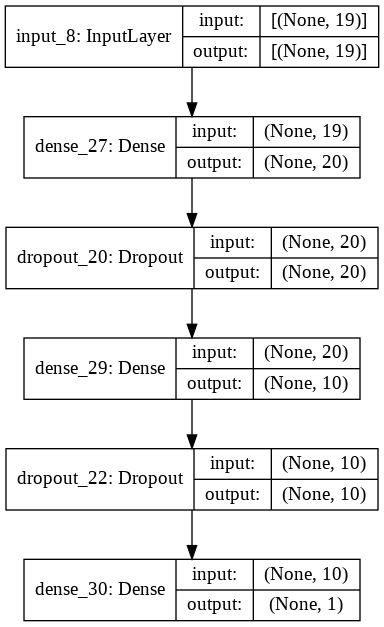

In [150]:
# plot graph of model
plot_model(model1, to_file='model.png', show_shapes=True)

In [151]:
X_train.shape

(9020, 19)

In [152]:
y_train.shape

(9020,)

In [153]:
model1.fit(X_train,y_train, epochs=300, batch_size=32, verbose=2)

Epoch 1/300
282/282 - 1s - loss: 5.9115
Epoch 2/300
282/282 - 0s - loss: 0.9331
Epoch 3/300
282/282 - 0s - loss: 0.6065
Epoch 4/300
282/282 - 0s - loss: 0.4935
Epoch 5/300
282/282 - 0s - loss: 0.3851
Epoch 6/300
282/282 - 0s - loss: 0.3171
Epoch 7/300
282/282 - 0s - loss: 0.2534
Epoch 8/300
282/282 - 0s - loss: 0.2093
Epoch 9/300
282/282 - 0s - loss: 0.1826
Epoch 10/300
282/282 - 0s - loss: 0.1680
Epoch 11/300
282/282 - 0s - loss: 0.1532
Epoch 12/300
282/282 - 0s - loss: 0.1468
Epoch 13/300
282/282 - 0s - loss: 0.1441
Epoch 14/300
282/282 - 0s - loss: 0.1349
Epoch 15/300
282/282 - 0s - loss: 0.1310
Epoch 16/300
282/282 - 0s - loss: 0.1305
Epoch 17/300
282/282 - 0s - loss: 0.1267
Epoch 18/300
282/282 - 0s - loss: 0.1225
Epoch 19/300
282/282 - 0s - loss: 0.1198
Epoch 20/300
282/282 - 0s - loss: 0.1135
Epoch 21/300
282/282 - 0s - loss: 0.1078
Epoch 22/300
282/282 - 0s - loss: 0.1071
Epoch 23/300
282/282 - 0s - loss: 0.1057
Epoch 24/300
282/282 - 0s - loss: 0.1042
Epoch 25/300
282/282 - 0s

In [154]:
X_test

array([[14.67984076, 14.6975757 , 14.92600024, ...,  0.306839  ,
         0.79695924,  0.69315964],
       [16.46142048, 16.17965978, 15.55600035, ..., -0.542515  ,
        -1.06212048, -0.36742036],
       [14.56060366, 14.88082641, 16.88699973, ...,  0.224133  ,
         3.71569634,  1.95339653],
       ...,
       [12.55835143, 12.99785406, 17.78400004, ...,  0.408622  ,
         6.59624857,  5.56964813],
       [14.64263188, 14.40095949, 15.71400034, ..., -0.944549  ,
         1.23206812,  0.32236852],
       [15.32804372, 15.04387013, 15.43899977, ...,  0.133544  ,
         0.93905628,  0.73095655]])

In [155]:
X_test.shape

(4444, 19)

In [156]:
X_train.shape

(9020, 19)

In [157]:
yhat1 = model1.predict(X_test)

In [158]:
error = mean_absolute_error(y_test, yhat1)
print('MAE: %.3f' % error)

MAE: 0.151


Classificator

In [159]:
attributes = ["flux_int","flux_peak","W1MAG","W2MAG","J_VISTA","KS_VISTA","MAG_G","MAG_R","MAG_I","MAG_Z","PSTAR_VISTA","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR","z_spec"]
dataset = df_sample[attributes].to_numpy()

In [160]:
df_sample[attributes]

,flux_int,flux_peak,W1MAG,W2MAG,J_VISTA,KS_VISTA,MAG_G,MAG_R,MAG_I,MAG_Z,PSTAR_VISTA,W1-W2,J-KS,KS-W1,G-R,R-Z,Z-J,G-RadioR,W2-RadioR,z_spec
0,14.271548,14.272466,14.449,14.211,14.706843,14.757310,15.9414,15.4132,15.2604,15.0925,0.000171,0.238000,-0.050467,0.308310,0.5282,0.3207,0.385657,1.669852,-0.060549,0.082
1,15.087712,15.005931,15.582,15.717,15.234133,14.885287,16.1638,15.5859,15.3284,15.1686,0.000171,-0.135000,0.348846,-0.696713,0.5779,0.4173,-0.065533,1.076088,0.629288,0.062
2,8.276081,8.479472,14.661,14.276,16.120893,15.419022,16.6373,16.5356,16.6504,16.1415,0.052478,0.385000,0.701871,0.758022,0.1017,0.3941,0.020607,8.361219,5.999919,0.391
3,12.600692,12.604439,19.226,19.309,19.790708,19.173853,19.9939,20.2113,20.0435,19.7645,0.499230,-0.083000,0.616855,-0.052147,-0.2174,0.4468,-0.026208,7.393208,6.708308,2.367
4,15.417818,15.128676,17.898,18.291,17.633600,17.159678,19.7773,18.7711,18.3317,17.9279,0.000171,-0.392999,0.473922,-0.738322,1.0062,0.8432,0.294300,4.359482,2.873182,0.271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71505,13.008310,13.038626,18.439,17.840,20.034221,18.905024,21.2537,21.5828,20.9368,20.0989,0.000010,0.598999,1.129197,0.466024,-0.3291,1.4839,0.064679,8.245390,4.831690,0.195
71506,13.113121,13.132223,16.787,16.525,17.724560,17.162191,20.4939,19.5336,18.6965,18.3080,0.999981,0.262000,0.562369,0.375191,0.9603,1.2256,0.583440,7.380779,3.411879,0.564
71507,11.578844,12.868261,17.047,16.629,18.276413,17.892172,19.0971,19.1318,18.7885,18.4751,0.000171,0.418000,0.384241,0.845172,-0.0347,0.6567,0.198687,7.518256,5.050156,0.586
71508,13.890164,13.856373,18.082,17.727,18.505855,18.459696,19.0425,18.8057,18.9779,18.8010,0.999657,0.355001,0.046159,0.377696,0.2368,0.0047,0.295145,5.152336,3.836835,0.963


In [161]:
y_class = df_sample["spec_class"].values
n_class = len(unique(y_class))
dataset,  y_class = dataset.astype('float'),y_class.astype("int")

In [162]:
from imblearn.over_sampling import RandomOverSampler

In [163]:
sampling_strategy_  = {0: 5000,
                      1: 10629,
                      2: 10629}

In [164]:
ros = RandomOverSampler(random_state=42,sampling_strategy=sampling_strategy_)
dataset, y_class = ros.fit_resample(dataset, y_class)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [165]:
from collections import Counter

In [166]:
Counter(y_class)

Counter({0: 5000, 1: 10629, 2: 10629})

In [167]:
n_features = dataset.shape[1]
X_train, X_test, y_train_class, y_test_class = train_test_split(dataset, y_class, test_size=0.33, random_state=1)


In [168]:
visible = Input(shape=(n_features,))
hidden1 = Dense(256, activation='relu', kernel_initializer='he_normal')(visible)
dropout1 = Dropout(0.3)(hidden1)
hidden2 = Dense(256, activation='relu', kernel_initializer='he_normal')(dropout1)
dropout2 = Dropout(0.3)(hidden2)

out_clas = Dense(3, activation='sigmoid')(dropout2)

In [169]:
model2 = Model(inputs=visible, outputs=[out_clas])

In [170]:
model2.compile(loss=['mse','sparse_categorical_crossentropy'], optimizer='adam')

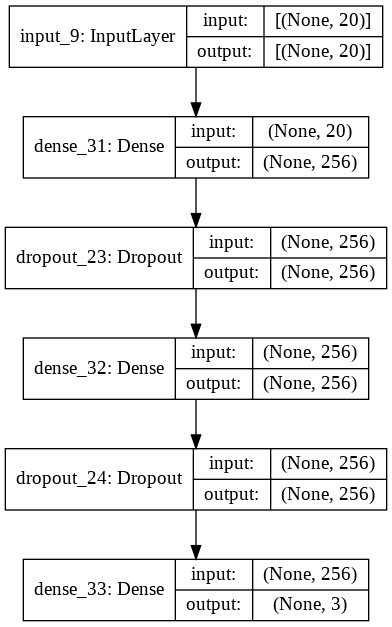

In [171]:
# plot graph of model
plot_model(model2, to_file='model.png', show_shapes=True)

In [172]:
model2.fit(X_train,y_train_class, epochs=2, batch_size=32, verbose=2)


Epoch 1/2
550/550 - 2s - loss: 0.5985
Epoch 2/2
550/550 - 1s - loss: 0.5944


In [173]:
yhat2 = model2.predict(X_test)
yhat2 = argmax(yhat2, axis=-1).astype('int')
acc = accuracy_score(y_test_class, yhat2)
print('Accuracy: %.3f' % acc)

Accuracy: 0.189


In [174]:
confusion_matrix(y_test_class,yhat2)

array([[1641,    0,    0],
       [3494,    0,    0],
       [3531,    0,    0]])

Random forest

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
clf = RandomForestClassifier(max_depth=15, random_state=0)

In [177]:
clf.fit(X_train, y_train_class)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [178]:
yhat2 = clf.predict(X_test)

In [179]:
yhat2

array([0, 1, 0, ..., 0, 1, 2])

In [180]:
confusion_matrix(y_test_class,yhat2)

array([[1641,    0,    0],
       [   0, 3326,  168],
       [   4,  177, 3350]])

data managing

In [181]:
null = ps_df[ps_df["z_spec"].isnull()]
attributes = ["flux_int","flux_peak","W1MAG","W2MAG","J_VISTA","KS_VISTA","MAG_G","MAG_R","MAG_I","MAG_Z","PSTAR_VISTA","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR"]
null = null[attributes]

In [182]:
predicted_redshifts = model1.predict(null.values)

In [183]:
null["z_spec"] = predicted_redshifts

In [184]:
predicted_classes = clf.predict(null.values)

In [185]:
null["z_class"] = predicted_classes

In [186]:
color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy
colors = null["z_class"].map(lambda x: color_wheel.get(x))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12dd375f90>,
      dtype=object)

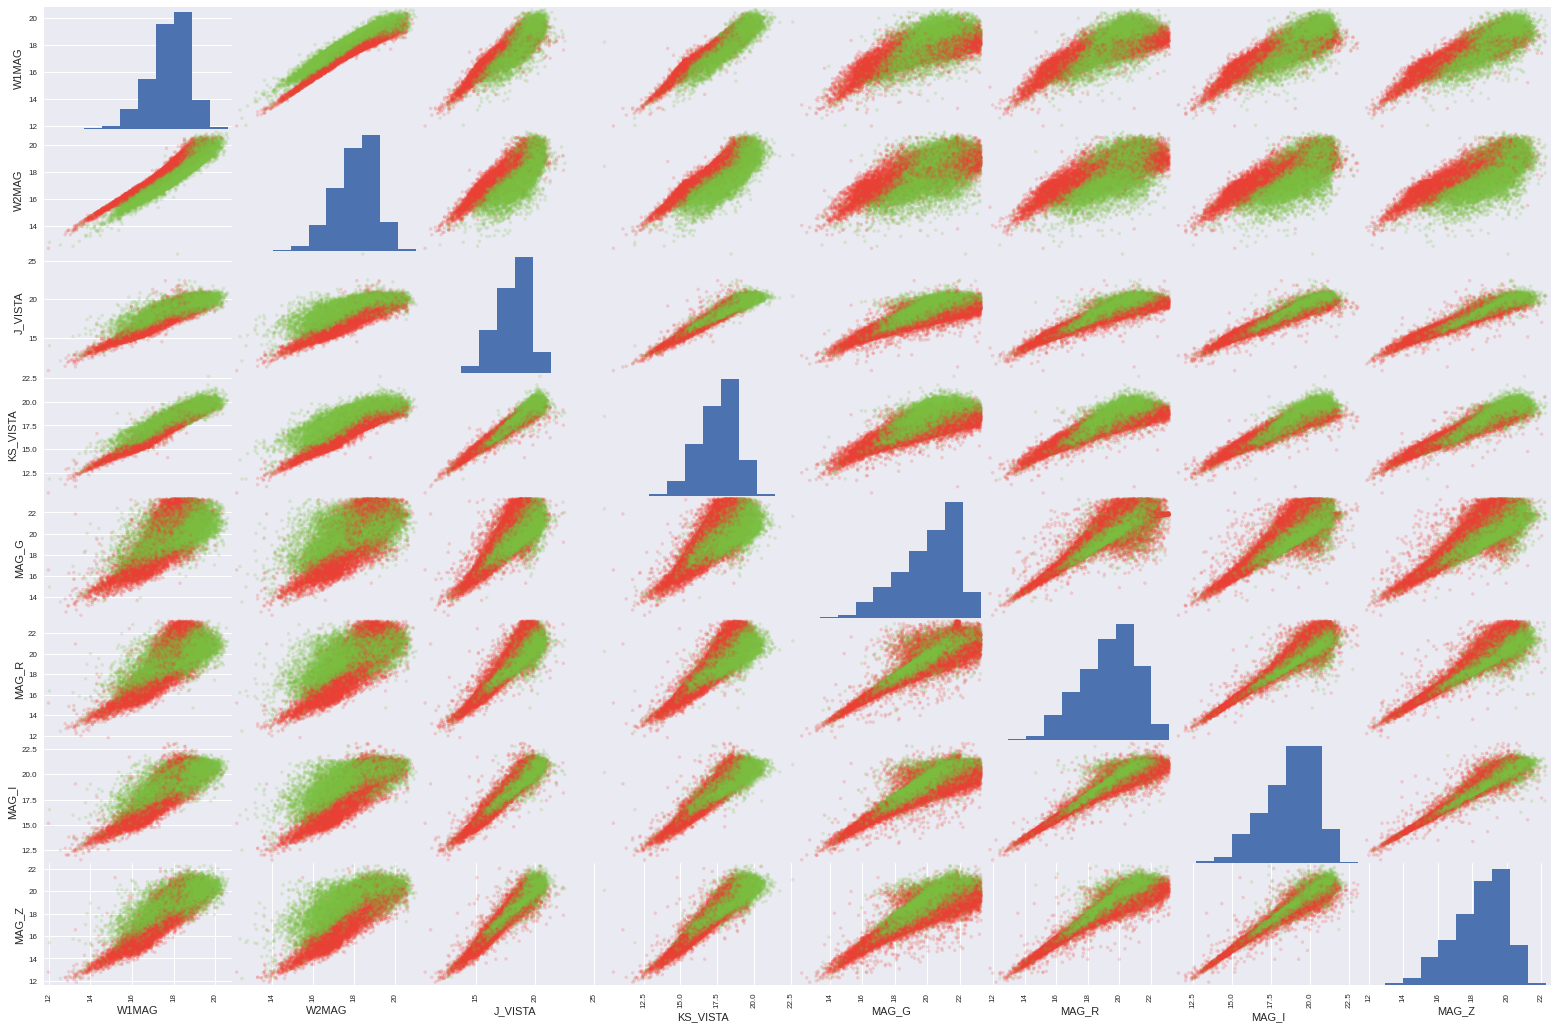

In [187]:
attributes = ["W1MAG","W2MAG","J_VISTA","KS_VISTA","MAG_G","MAG_R","MAG_I","MAG_Z"]
scatter_matrix(null[attributes],color = colors, figsize=(27,18),alpha = 0.2)

In [188]:
null["z_class"].value_counts()

2    37955
1    20094
Name: z_class, dtype: int64

DES CATALOGUE

In [189]:
des_df

,col0,catalogue_id,n_components,flux_int,flux_peak,quality_level,SOURCEID_VISTA,W1MAG,W2MAG,J_VISTA,KS_VISTA,PSTAR_VISTA,MAG_G,MAG_R,MAG_I,MAG_Z,z_spec,spec_class,W1-W2,J-KS,KS-W1,G-R,R-Z,Z-J,G-RadioR,W2-RadioR
0,2,1542,1,15.087712,15.005931,"b""b'NOT_VALIDATED'""",472906754566,15.582000,15.717,15.234133,14.885287,0.000171,16.596,15.817,15.492,15.222,0.062,1,-0.135000,0.348846,-0.696713,0.779,0.595,-0.012133,1.508288,0.629288
1,10,783,1,14.791615,15.142908,"b""b'NOT_VALIDATED'""",472906735951,16.441000,16.106,17.142910,16.910446,0.052478,17.561,17.526,17.507,17.502,0.723,1,0.334999,0.232464,0.469447,0.035,0.024,0.359090,2.769385,1.314385
2,13,1377,1,13.793266,13.862125,"b""b'NOT_VALIDATED'""",472681339854,19.573001,19.623,19.522250,19.605973,0.052478,20.136,19.883,19.735,19.732,3.061,1,-0.050000,-0.083723,0.032972,0.253,0.151,0.209750,6.342734,5.829734
3,14,97,1,13.474419,13.774631,"b""b'NOT_VALIDATED'""",472890266372,18.098000,17.416,17.961023,18.245827,0.993865,17.905,17.771,17.820,17.885,NaN,<NA>,0.682001,-0.284804,0.147827,0.134,-0.114,-0.076023,4.430581,3.941581
4,15,44,1,18.826541,14.740983,"b""b'UNCERTAIN '""",473426008788,17.230000,17.017,17.044435,16.486081,0.003067,18.515,17.967,17.429,17.219,NaN,<NA>,0.213000,0.558354,-0.743919,0.548,0.748,0.174565,-0.311541,-1.809540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175749,259245,675,1,15.166006,15.044805,"b""b'NOT_VALIDATED'""",473340908930,17.226000,17.430,16.921362,16.488793,0.000171,19.306,18.101,17.661,17.388,0.279,1,-0.203999,0.432569,-0.737207,1.205,0.713,0.466638,4.139994,2.263993
175750,259246,2281,1,11.623332,11.657555,"b""b'NOT_VALIDATED'""",473200338277,16.889000,16.816,16.904316,16.434285,0.003067,19.288,18.053,17.607,17.442,NaN,<NA>,0.072999,0.470031,-0.454715,1.235,0.611,0.537684,7.664668,5.192668
175751,259247,1484,1,15.057342,14.844983,"b""b'NOT_VALIDATED'""",472854980131,14.490000,13.830,17.293708,15.488930,0.486486,19.174,18.304,17.976,17.829,NaN,<NA>,0.660000,1.804778,0.998930,0.870,0.475,0.535292,4.116658,-1.227342
175752,259249,2758,1,16.405442,15.796757,"b""b'NOT_VALIDATED'""",472602670940,17.321000,16.871,17.172320,17.063626,0.003067,18.257,17.758,17.597,17.445,NaN,<NA>,0.450000,0.108694,-0.257374,0.499,0.313,0.272680,1.851558,0.465557


In [190]:
attributes = ["flux_int","flux_peak","MAG_I","MAG_R","MAG_G","MAG_Z","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR","spec_class","z_spec"]
des_df = des_df[attributes]
df_sample = des_df.dropna()
attributes = ["flux_int","flux_peak","MAG_I","MAG_R","MAG_G","MAG_Z","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR"]
dataset = df_sample[attributes].to_numpy()

In [191]:
y_test = df_sample["spec_class"].values
dataset, y_test = dataset.astype("float"), y_test.astype("float")
n_features = dataset.shape[1]
X_train, X_test, y_train, y_test = train_test_split(dataset, y_test, test_size=0.33, random_state=1)

In [192]:
visible = Input(shape=(n_features,))
hidden1 = Dense(20, activation='relu', kernel_initializer='he_normal')(visible)
dropout1 = Dropout(0.2)(hidden1)
hidden3 = Dense(50, activation = "relu", kernel_initializer="he_normal")(dropout1)
dropout3 = Dropout(0.2)(hidden3)
hidden2 = Dense(10, activation='relu', kernel_initializer='he_normal')(dropout1)
dropout2 = Dropout(0.2)(hidden2)

out_reg = Dense(1, activation='linear')(dropout2)

model1 = Model(inputs=visible, outputs=[out_reg])

model1.compile(loss=['mse','sparse_categorical_crossentropy'], optimizer='adam')

In [193]:
model1.fit(X_train,y_train, epochs=300, batch_size=32, verbose=2)

Epoch 1/300
263/263 - 1s - loss: 11.0738
Epoch 2/300
263/263 - 0s - loss: 1.5563
Epoch 3/300
263/263 - 0s - loss: 0.9725
Epoch 4/300
263/263 - 0s - loss: 0.6997
Epoch 5/300
263/263 - 0s - loss: 0.5424
Epoch 6/300
263/263 - 0s - loss: 0.4188
Epoch 7/300
263/263 - 0s - loss: 0.3452
Epoch 8/300
263/263 - 0s - loss: 0.2966
Epoch 9/300
263/263 - 0s - loss: 0.2628
Epoch 10/300
263/263 - 0s - loss: 0.2376
Epoch 11/300
263/263 - 0s - loss: 0.2129
Epoch 12/300
263/263 - 0s - loss: 0.1926
Epoch 13/300
263/263 - 0s - loss: 0.1770
Epoch 14/300
263/263 - 0s - loss: 0.1633
Epoch 15/300
263/263 - 0s - loss: 0.1532
Epoch 16/300
263/263 - 0s - loss: 0.1450
Epoch 17/300
263/263 - 0s - loss: 0.1381
Epoch 18/300
263/263 - 0s - loss: 0.1330
Epoch 19/300
263/263 - 0s - loss: 0.1325
Epoch 20/300
263/263 - 0s - loss: 0.1289
Epoch 21/300
263/263 - 0s - loss: 0.1272
Epoch 22/300
263/263 - 0s - loss: 0.1264
Epoch 23/300
263/263 - 0s - loss: 0.1253
Epoch 24/300
263/263 - 0s - loss: 0.1232
Epoch 25/300
263/263 - 0

In [194]:
yhat1 = model1.predict(X_test)
error = mean_absolute_error(y_test, yhat1)
print('MAE: %.3f' % error)

MAE: 0.117


In [195]:
attributes = ["flux_int","flux_peak","MAG_I","MAG_R","MAG_G","MAG_Z","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR","z_spec"]
dataset = df_sample[attributes].to_numpy()

In [196]:
y_class = df_sample["spec_class"].values
n_class = len(unique(y_class))
dataset,  y_class = dataset.astype('float'),y_class.astype("int")

In [197]:
n_features = dataset.shape[1]
X_train, X_test, y_train_class, y_test_class = train_test_split(dataset, y_class, test_size=0.33, random_state=1)


In [198]:
sampling_strategy_  = {0: 2000,
                      1: 4000,
                      2: 10598}

ros = RandomOverSampler(random_state=42,sampling_strategy=sampling_strategy_)
dataset, y_class = ros.fit_resample(dataset, y_class)

X_train, X_test, y_train_class, y_test_class = train_test_split(dataset, y_class, test_size=0.33, random_state=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [199]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train_class)
yhat2 = clf.predict(X_test)

In [200]:
confusion_matrix(y_test_class,yhat2)

array([[ 679,    0,    0],
       [   0, 1242,   83],
       [   0,   80, 3394]])

In [201]:
null = ps_df[des_df["z_spec"].isnull()]
attributes = ["flux_int","flux_peak","MAG_I","MAG_R","MAG_G","MAG_Z","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR"]
null = null[attributes]

predicted_redshifts = model1.predict(null.values)

null["z_spec"] = predicted_redshifts

predicted_classes = clf.predict(null.values)

null["z_class"] = predicted_classes

color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy
colors = null["z_class"].map(lambda x: color_wheel.get(x))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [202]:
null

,flux_int,flux_peak,MAG_I,MAG_R,MAG_G,MAG_Z,W1-W2,J-KS,KS-W1,G-R,R-Z,Z-J,G-RadioR,W2-RadioR,z_spec,z_class
3,12.600692,12.604439,20.0435,20.2113,19.9939,19.7645,-0.083000,0.616855,-0.052147,-0.2174,0.4468,-0.026208,7.393208,6.708308,1.234294,1
4,15.417818,15.128676,18.3317,18.7711,19.7773,17.9279,-0.392999,0.473922,-0.738322,1.0062,0.8432,0.294300,4.359482,2.873182,1.970382,1
5,14.552652,14.587673,18.2139,18.2598,18.2794,18.2575,0.657999,-0.020713,0.546390,0.0196,0.0023,-0.096177,3.726748,2.617348,1.207542,1
8,13.793266,13.862125,19.9381,19.9366,20.0487,19.8634,-0.050000,-0.083723,0.032972,0.1121,0.0732,0.341150,6.255434,5.829734,1.220227,1
9,13.474419,13.774631,18.0120,18.1005,18.2178,18.1395,0.682001,-0.284804,0.147827,0.1173,-0.0390,0.178477,4.743381,3.941581,1.196310,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71508,13.890164,13.856373,18.9779,18.8057,19.0425,18.8010,0.355001,0.046159,0.377696,0.2368,0.0047,0.295145,5.152336,3.836835,1.227002,1
71509,13.580781,13.540902,17.5284,17.9213,18.9500,17.2462,-0.184000,0.366510,-0.788518,1.0287,0.6751,0.443208,5.369219,3.828219,1.924170,1
71510,13.920274,13.833769,18.3550,18.8655,19.9359,18.0672,0.197000,0.475127,0.228450,1.0704,0.7983,0.527623,6.015626,2.718726,1.499551,1
71511,15.166006,15.044805,17.6677,18.1093,19.3401,17.2037,-0.203999,0.432569,-0.737207,1.2308,0.9056,0.282338,4.174094,2.263993,1.972502,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12da4e1ad0>,
      dtype=object)

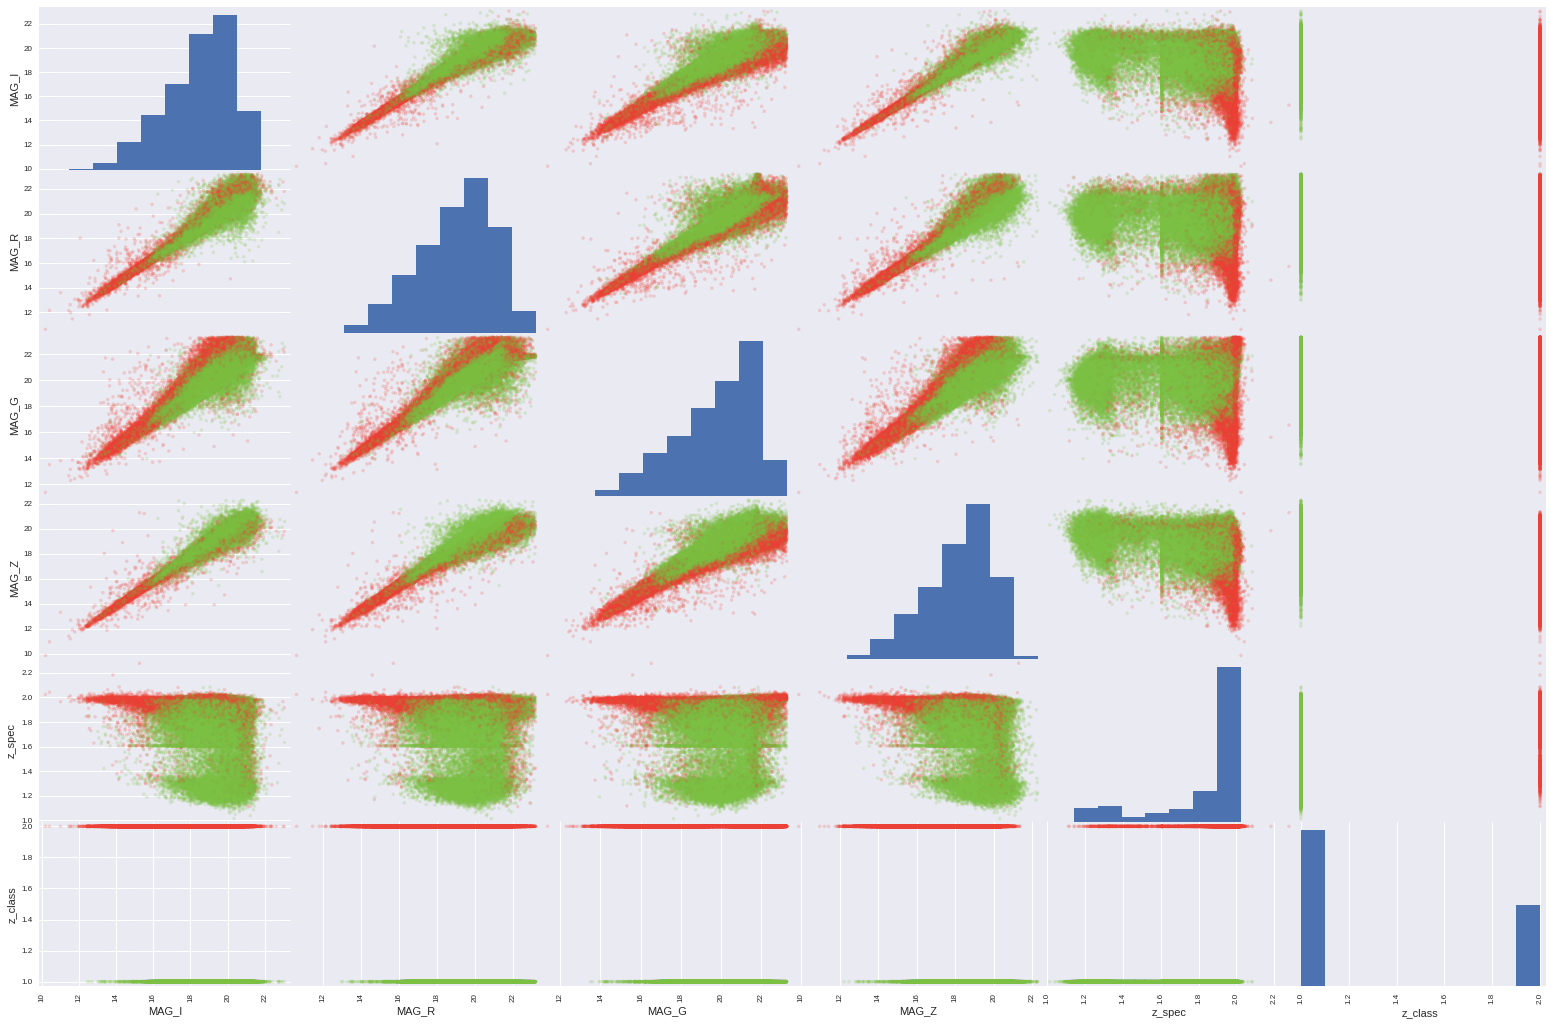

In [203]:
attributes = ["MAG_I","MAG_R","MAG_G","MAG_Z","z_spec","z_class"]
scatter_matrix(null[attributes],color = colors, figsize=(27,18),alpha = 0.2)

In [204]:
null["z_class"].value_counts()

1    42530
2    22119
Name: z_class, dtype: int64

Skymapper catalogue

In [205]:
sm_df

,col0,catalogue_id,n_components,flux_int,flux_peak,quality_level,SOURCEID_VISTA,W1MAG,W2MAG,J_VISTA,KS_VISTA,PSTAR_VISTA,MAG_U,MAG_G,MAG_R,MAG_I,MAG_Z,z_spec,spec_class,W1-W2,J-KS,KS-W1,U-G,G-R,R-Z,Z-J,G-RadioR,W2-RadioR
0,0,54,1,19.226921,16.343929,"b""b'UNCERTAIN '""",601340238219,18.024,17.441,18.542423,18.482422,9.999990e-01,18.5435,18.7459,18.7376,18.4589,18.771,NaN,<NA>,0.583000,0.060001,0.458422,-0.2024,0.0083,-0.0334,0.228577,-0.481021,-1.785920
1,2,1542,1,15.087712,15.005931,"b""b'NOT_VALIDATED'""",472906754566,15.582,15.717,15.234133,14.885287,1.714090e-04,18.2120,16.7960,16.2420,15.6850,15.393,0.062,1,-0.135000,0.348846,-0.696713,1.4160,0.5540,0.8490,0.158867,1.708288,0.629288
2,3,2301,2,8.276081,8.479472,"b""b'NOT_VALIDATED'""",473526124269,14.661,14.276,16.120893,15.419022,5.247814e-02,17.0460,16.6230,16.3430,16.4480,16.152,0.391,1,0.385000,0.701871,0.758022,0.4230,0.2800,0.1910,0.031107,8.346919,5.999919
3,5,833,1,15.417818,15.128676,"b""b'NOT_VALIDATED'""",473222782226,17.898,18.291,17.633600,17.159678,1.714090e-04,19.0457,19.1081,19.0369,18.5558,18.889,0.271,1,-0.392999,0.473922,-0.738322,-0.0624,0.0712,0.1479,1.255400,3.690282,2.873182
4,6,56,1,21.787255,18.053859,"b""b'UNCERTAIN '""",601335508306,17.344,16.853,17.825172,17.349025,5.292210e-07,18.7282,18.7101,18.5990,18.6970,18.840,NaN,<NA>,0.491001,0.476147,0.005025,0.0181,0.1111,-0.2410,1.014828,-3.077155,-4.934255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92008,259247,1484,1,15.057342,14.844983,"b""b'NOT_VALIDATED'""",472854980131,14.490,13.830,17.293708,15.488930,4.864865e-01,18.3960,17.9622,18.7550,17.8620,18.091,NaN,<NA>,0.660000,1.804778,0.998930,0.4338,-0.7928,0.6640,0.797292,2.904858,-1.227342
92009,259248,2345,1,16.244485,15.515209,"b""b'NOT_VALIDATED'""",473711165353,17.861,17.378,18.179733,17.616943,9.996572e-01,18.6293,18.2980,18.5060,18.4900,18.274,NaN,<NA>,0.483000,0.562790,-0.244057,0.3313,-0.2080,0.2320,0.094267,2.053515,1.133514
92010,259249,2758,1,16.405442,15.796757,"b""b'NOT_VALIDATED'""",472602670940,17.321,16.871,17.172320,17.063626,3.067485e-03,18.4003,18.3840,17.9780,17.6260,17.494,NaN,<NA>,0.450000,0.108694,-0.257374,0.0163,0.4060,0.4840,0.321680,1.978558,0.465557
92011,259250,3022,1,10.339086,10.395164,"b""b'NOT_VALIDATED'""",473409887073,14.105,13.830,14.990262,14.460981,9.996572e-01,17.5470,16.8830,16.6670,16.2140,15.993,NaN,<NA>,0.275000,0.529281,0.355981,0.6640,0.2160,0.6740,1.002738,6.543914,3.490914


In [206]:
attributes = ["flux_int","flux_peak","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR","spec_class","z_spec"]
sm_df = sm_df[attributes]
df_sample = sm_df.dropna()
attributes = ["flux_int","flux_peak","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR"]
dataset = df_sample[attributes].to_numpy()

In [207]:
y_test = df_sample["spec_class"].values
dataset, y_test = dataset.astype("float"), y_test.astype("float")
n_features = dataset.shape[1]
X_train, X_test, y_train, y_test = train_test_split(dataset, y_test, test_size=0.33, random_state=1)

visible = Input(shape=(n_features,))
hidden1 = Dense(20, activation='relu', kernel_initializer='he_normal')(visible)
dropout1 = Dropout(0.2)(hidden1)
hidden3 = Dense(50, activation = "relu", kernel_initializer="he_normal")(dropout1)
dropout3 = Dropout(0.2)(hidden3)
hidden2 = Dense(10, activation='relu', kernel_initializer='he_normal')(dropout1)
dropout2 = Dropout(0.2)(hidden2)

out_reg = Dense(1, activation='linear')(dropout2)

model1 = Model(inputs=visible, outputs=[out_reg])

model1.compile(loss=['mse','sparse_categorical_crossentropy'], optimizer='adam')

In [208]:
model1.fit(X_train,y_train, epochs=300, batch_size=32, verbose=2)

Epoch 1/300
308/308 - 1s - loss: 15.2210
Epoch 2/300
308/308 - 0s - loss: 2.2289
Epoch 3/300
308/308 - 0s - loss: 1.3210
Epoch 4/300
308/308 - 0s - loss: 0.9467
Epoch 5/300
308/308 - 0s - loss: 0.7160
Epoch 6/300
308/308 - 0s - loss: 0.5715
Epoch 7/300
308/308 - 0s - loss: 0.4601
Epoch 8/300
308/308 - 0s - loss: 0.3781
Epoch 9/300
308/308 - 0s - loss: 0.3235
Epoch 10/300
308/308 - 0s - loss: 0.2813
Epoch 11/300
308/308 - 0s - loss: 0.2392
Epoch 12/300
308/308 - 0s - loss: 0.2030
Epoch 13/300
308/308 - 0s - loss: 0.1829
Epoch 14/300
308/308 - 0s - loss: 0.1631
Epoch 15/300
308/308 - 0s - loss: 0.1435
Epoch 16/300
308/308 - 0s - loss: 0.1316
Epoch 17/300
308/308 - 0s - loss: 0.1229
Epoch 18/300
308/308 - 0s - loss: 0.1182
Epoch 19/300
308/308 - 0s - loss: 0.1107
Epoch 20/300
308/308 - 0s - loss: 0.1081
Epoch 21/300
308/308 - 0s - loss: 0.1061
Epoch 22/300
308/308 - 0s - loss: 0.1045
Epoch 23/300
308/308 - 0s - loss: 0.1033
Epoch 24/300
308/308 - 0s - loss: 0.1022
Epoch 25/300
308/308 - 0

In [209]:
yhat1 = model1.predict(X_test)
error = mean_absolute_error(y_test, yhat1)
print('MAE: %.3f' % error)

MAE: 0.139


In [210]:
attributes = ["flux_int","flux_peak","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR","z_spec"]
dataset = df_sample[attributes].to_numpy()

y_class = df_sample["spec_class"].values
n_class = len(unique(y_class))
dataset,  y_class = dataset.astype('float'),y_class.astype("int")

n_features = dataset.shape[1]
X_train, X_test, y_train_class, y_test_class = train_test_split(dataset, y_class, test_size=0.33, random_state=1)

dataset, y_class = ros.fit_resample(dataset, y_class)

X_train, X_test, y_train_class, y_test_class = train_test_split(dataset, y_class, test_size=0.33, random_state=1)

ValueError: ignored

In [ ]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train_class)
yhat2 = clf.predict(X_test)

confusion_matrix(y_test_class,yhat2)

In [ ]:
null = sm_df[des_df["z_spec"].isnull()]
attributes = ["flux_int","flux_peak","W1-W2","J-KS","KS-W1","G-R","R-Z","Z-J","G-RadioR","W2-RadioR"]
null = null[attributes]

predicted_redshifts = model1.predict(null.values)

null["z_spec"] = predicted_redshifts

predicted_classes = clf.predict(null.values)

null["z_class"] = predicted_classes

color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy
colors = null["z_class"].map(lambda x: color_wheel.get(x))


In [ ]:
attributes = ["W1-W2","J-KS","R-Z","Z-J","z_spec","z_class"]
scatter_matrix(null[attributes],color = colors, figsize=(27,18),alpha = 0.2)

In [ ]:
null["z_class"].value_counts()